<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---

- **This notebook aims to analyse the movies data from the year 2006 to 2016 with many various graphics and gives an interpretation of these data.**

---
<a name = Section2></a>
# **2. Problem Statement**
---
  
  - **From biggest Trends to biggest changes, how entertainment has evolved through the decade.**

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---



### **Installing Libraries**

- Have installed pandas-profiling through terminal

In [18]:
!pip install -q datascience

### **Upgrading Libraries**

- All the required libraries has been upgraded to the latest version

### **Importing Libraries**



In [60]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
from pandas.plotting import parallel_coordinates
pd.set_option('mode.chained_assignment', None)                      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)                         # To display all the data in each column
pd.options.display.max_columns = 50     
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
np.set_printoptions(precision=4) 
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
plt.style.use('seaborn-whitegrid')                                  # To apply seaborn whitegrid style to the plots.
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)        # To adjust seaborn settings for the plots.
%matplotlib inline

#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')                                  # To suppress all the warnings in the notebook.



---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


|Id|Feature|Description|
|:--|:--|:--|
|01|Rank|Movie Rank| 
|02| Title | Title of the movie|  
|03| Genre | The various Genre that the movie can be associated with| 
|04| Description| Short description about the movie|   
|05| Director| Director of the movie|
|06| Actors| Main actors in the movie|
|07| Year| Year in which the movie was released|
|08| Runtime (minutes)| Total movie playing time|
|09| Rating | Movie rating|
|10| Votes| Votes for the movie|
|11| Revenue (Millions)| Revenue by the movie (in millions)|
|12| Metascore| Is the score of the movie on the metacritic website by critics|


In [949]:
movies_data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')
print('Data Shape:', movies_data.shape)
movies_data.head(5)

Data Shape: (1000, 12)


Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                                                                                                                                                                                                      Description  \
0                                                                                                 A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.   
1                                                                                                 Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.   
2                                                                   Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.   
3  In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.   
4                                             A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.   

               Director  \
0            James Gunn   
1          Ridley Scott   
2    M. Night Shyamalan   
3  Christophe Lourdelet   
4            David Ayer   

                                                                       Actors  \
0                        Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana   
1     Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron   
2            James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula   
3  Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson   
4                          Will Smith, Jared Leto, Margot Robbie, Viola Davis   

   Year  Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
0  2014                121     8.1  757074              333.13       76.0  
1  2012                124     7.0  485820              126.46       65.0  
2  2016                117     7.3  157606              138.12       62.0  
3  2016                108     7.2   60545              270.32       59.0  
4  2016                123     6.2  393727              325.02       40.0

### **Data Description**



In [3]:
movies_data.describe()

Rank         Year  Runtime (Minutes)       Rating         Votes  \
count  1000.000000  1000.000000        1000.000000  1000.000000  1.000000e+03   
mean    500.500000  2012.783000         113.172000     6.723200  1.698083e+05   
std     288.819436     3.205962          18.810908     0.945429  1.887626e+05   
min       1.000000  2006.000000          66.000000     1.900000  6.100000e+01   
25%     250.750000  2010.000000         100.000000     6.200000  3.630900e+04   
50%     500.500000  2014.000000         111.000000     6.800000  1.107990e+05   
75%     750.250000  2016.000000         123.000000     7.400000  2.399098e+05   
max    1000.000000  2016.000000         191.000000     9.000000  1.791916e+06   

       Revenue (Millions)   Metascore  
count          872.000000  936.000000  
mean            82.956376   58.985043  
std            103.253540   17.194757  
min              0.000000   11.000000  
25%             13.270000   47.000000  
50%             47.985000   59.500000  
75%            113.715000   72.000000  
max            936.630000  100.000000

### **Data Information**

In [9]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---



In [15]:
profile=movies_data.profile_report(title="Movie Dataset PreProfiling")

In [48]:
profile

#profile.to_file(output_file="moviedataprofiling.html")

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---





 

- From Pandas Profiling we have observed that there are missing values in 2 variables Revenue and Metascore*

In [46]:
#movies_data['Revenue (Millions)'].value_counts()
movies_data['Metascore'].value_counts()


66.0    25
72.0    25
68.0    25
64.0    24
57.0    23
        ..
91.0     1
20.0     1
19.0     1
16.0     1
11.0     1
Name: Metascore, Length: 84, dtype: int64

In [723]:
nulldata1=pd.isnull(movies_data["Revenue (Millions)"])
movies_data[nulldata1].head()

Title            Genre  \
7                  Mindhorn           Comedy   
22          Horror-Thirller  Horror-Thirller   
25          Paris pieds nus           Comedy   
39                5- 25- 77           Comedy   
42  Don't Fuck in the Woods  Horror-Thirller   

                                                                                                                                                                                                                                        Description  \
7   A has-been actor best known for playing the title character in the 1980s detective series "Mindhorn" must work with the police when a serial killer says that he will only speak with Detective Mindhorn, whom he believes to be a real person.   
22                             A cold-blooded predatory couple while cruising the streets in search of their next victim, will stumble upon a 17-year-old high school girl, who will be sedated, abducted and chained in the strangers' guest room.   
25                                                                                                                                                                      Fiona visits Paris for the first time to assist her myopAdventure-Animation   
39                                                                            Alienated, hopeful-filmmaker Pat Johnson's epic story growing up in rural Illinois, falling in love, and becoming the first fan of the movie that changed everything.   
42                                                                                        A group of friends are going on a camping trip to celebrate graduating college. But once they enter the woods, the proverbial shit starts to hit the fan.   

                      Director                                    Actors  \
7                   Sean Foley             Essie DaviAdventure-Animation   
22                   Ben Young              Emma BootAdventure-Animation   
25  DominiqAdventure-Animation  Fiona Gordon, DominiqAdventure-Animation   
39        Patrick Read Johnson      John Francis DaleAdventure-Animation   
42               Shawn Burkett        Brittany BlantoAdventure-Animation   

    Year  Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
7   2016                 89     6.4   2490                 NaN        7.1  
22  2016                108     6.7   1115                 NaN        7.2  
25  2016                 83     6.8    222                 NaN        NaN  
39  2007                113     7.1    241                 NaN        NaN  
42  2016                 73     2.7    496                 NaN        NaN

In [724]:
nulldata2=pd.isnull(movies_data["Metascore"])
movies_data[nulldata2].head()

Title            Genre  \
25            Paris pieds nus           Comedy   
26  Bahubali: Horror-Thirller     Action-SciFi   
27      DeAdventure-Animation  Horror-Thirller   
39                  5- 25- 77           Comedy   
42    Don't Fuck in the Woods  Horror-Thirller   

                                                                                                                                                              Description  \
25                                                                                            Fiona visits Paris for the first time to assist her myopAdventure-Animation   
26                                                     In ancient India, an adventurous and daring man becomes involved in a decades old feud between two warring people.   
27                      A young woman must save herself and her friends from an ancient evil that stalks its victims through the real-life phenomenon of sleep paralysis.   
39  Alienated, hopeful-filmmaker Pat Johnson's epic story growing up in rural Illinois, falling in love, and becoming the first fan of the movie that changed everything.   
42              A group of friends are going on a camping trip to celebrate graduating college. But once they enter the woods, the proverbial shit starts to hit the fan.   

                      Director  \
25  DominiqAdventure-Animation   
26              S.S. Rajamouli   
27              Phillip Guzman   
39        Patrick Read Johnson   
42               Shawn Burkett   

                                                       Actors  Year  \
25                   Fiona Gordon, DominiqAdventure-Animation  2016   
26                  Prabhas, Rana DaggubatAdventure-Animation  2015   
27  Jocelin Donahue, Jesse Bradford, Jesse Borrego,Lori Petty  2016   
39                       John Francis DaleAdventure-Animation  2007   
42                         Brittany BlantoAdventure-Animation  2016   

    Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
25                 83     6.8    222                 NaN        NaN  
26                159     8.3  76193                6.50        NaN  
27                 99     4.7    523                0.01        NaN  
39                113     7.1    241                 NaN        NaN  
42                 73     2.7    496                 NaN        NaN

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---



In [950]:
#Removing column Rank with drop function(As it is not useful in any analysis)

movies_data.drop('Rank',axis=1,inplace=True)

In [951]:
# Replcing Null values in column Revenue and Metascore with median values of each column respectively

movies_data['Revenue (Millions)'].fillna((movies_data['Revenue (Millions)'].median()), inplace=True)
movies_data['Metascore'].fillna((movies_data['Metascore'].median()), inplace=True)

In [952]:
movies_data.info()
#movies_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1000 non-null   object 
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  1000 non-null   float64
 10  Metascore           1000 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 86.1+ KB


In [ ]:
# Using regular expression to compact the number of distinct values in genre column by grouping them in 1 relevant genre

pattern1=r'Ac.*$'  #r'Sc.*$'
movies_data.replace(pattern1,'Action-SciFi',regex=True,inplace=True)
                    
pattern2=r'Ho.*$' #r'Th.*$' r'Cr.*$'
movies_data.replace(pattern2,'Horror-Thirller',regex=True,inplace=True)
                    
pattern3=r'Co.*$' #r'Fam.*$'
movies_data.replace(pattern3,'Comedy',regex=True,inplace=True)
                    
pattern4=r'Ro.*$' #r'Dr.*$'
movies_data.replace(pattern4,'Romantic-Drama',regex=True,inplace=True)
                    
pattern5=r'Ad.*$' #r'An.*$' r'Fan.*$'
movies_data.replace(pattern5,'Adventure-Animation',regex=True,inplace=True)




In [481]:
movies_data['Genre'].value_counts()

Action-SciFi           385
Horror-Thirller        285
Comedy                 191
Romantic-Drama          90
Adventure-Animation     49
Name: Genre, dtype: int64

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

- This section is emphasised on asking the right questions and perform analysis using the data.



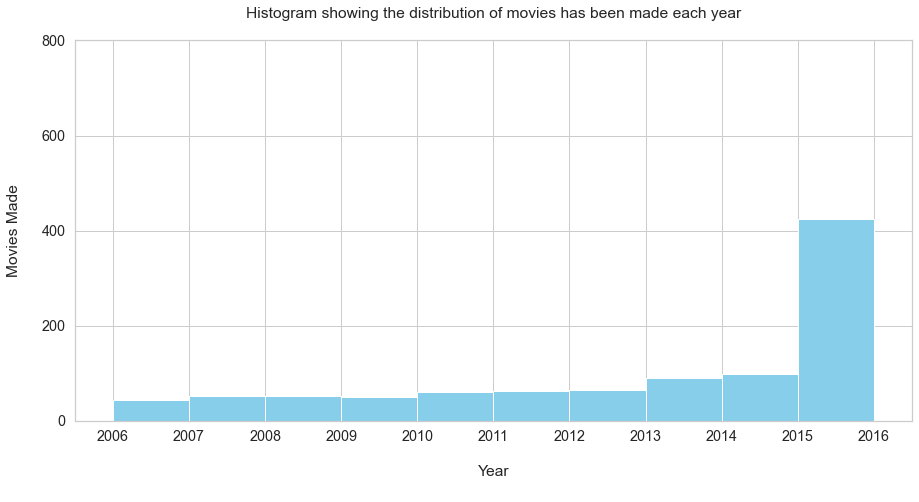

In [142]:
# Number of movies made each year 

bins = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
movies_data['Year'].plot(kind='hist', bins=bins, figsize=(15, 7), color='skyblue', yticks=np.arange(0, 1000, 200),xticks=bins)
plt.xlabel('\nYear\n')
plt.ylabel('Movies Made\n')
plt.title('Histogram showing the distribution of movies has been made each year\n')

plt.savefig('first.png')  

#movies_data.plot(kind='bar', x='Year', y='Title', figsize=(10, 6), color='purple', yticks=np.arange(0,1000,200))

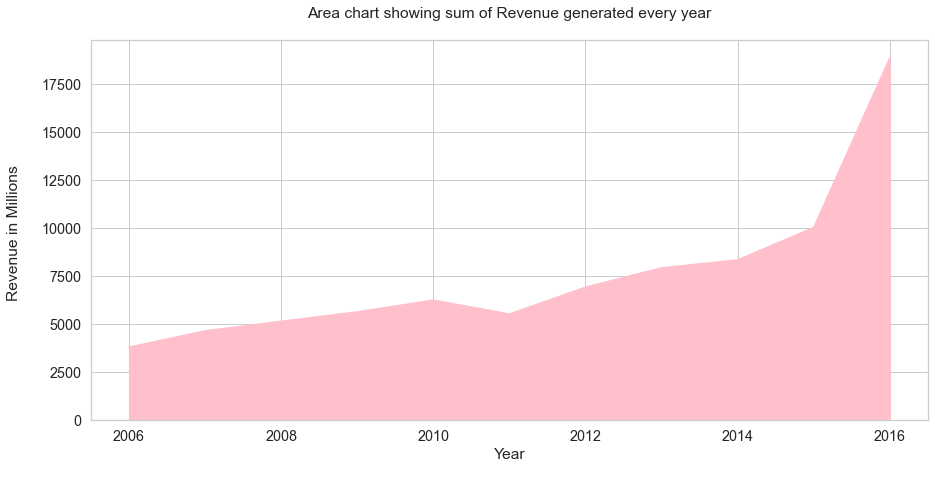

In [136]:
# Sum of Revenue generated over the years 

movies_data.groupby(['Year'])['Revenue (Millions)'].sum().plot(kind='area',figsize=(15, 7), color='pink')

plt.xlabel('Year\n')
plt.ylabel('Revenue in Millions \n')
plt.title('Area chart showing sum of Revenue generated every year\n')

plt.savefig('second.png')  


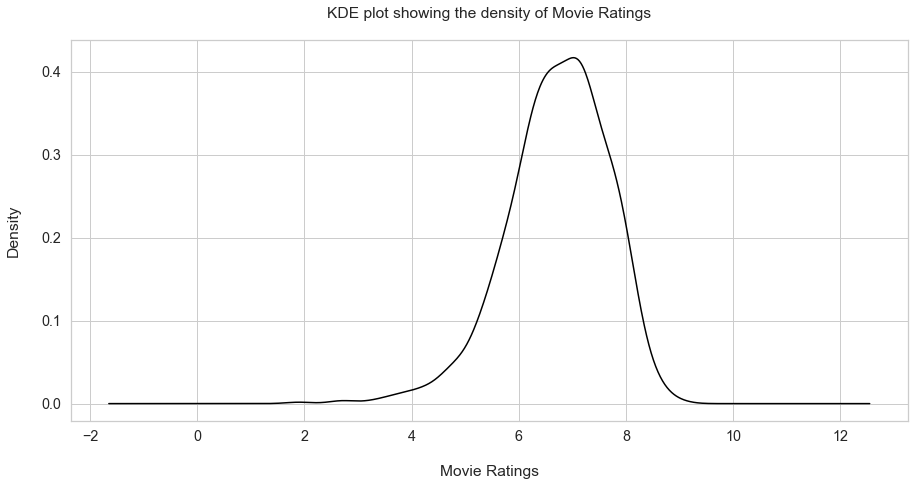

In [143]:
#What is the maximum number of ratings given by viewers

movies_data['Rating'].plot(kind='kde', figsize=(15, 7), color='black')

plt.xlabel('\nMovie Ratings\n')
plt.ylabel('Density\n')
plt.title('KDE plot showing the density of Movie Ratings\n')

plt.savefig('third.png')

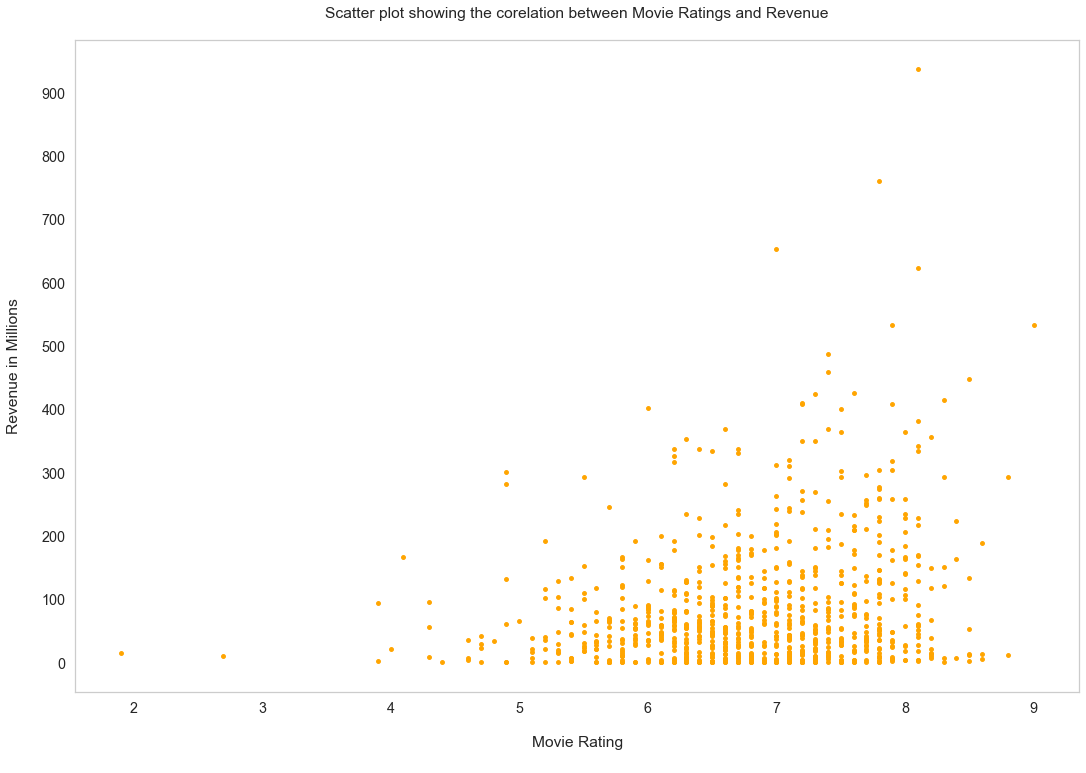

In [526]:
#How much is the Revenue depends on the Ratings 

movies_data.plot(kind='scatter', x='Rating', y='Revenue (Millions)', figsize=(18, 12), s=15,color='orange', grid=False,yticks=np.arange(0,1000,100))

plt.xlabel('\nMovie Rating\n')
plt.ylabel('Revenue in Millions\n')
plt.title('Scatter plot showing the corelation between Movie Ratings and Revenue\n')

plt.savefig('Forth.png')

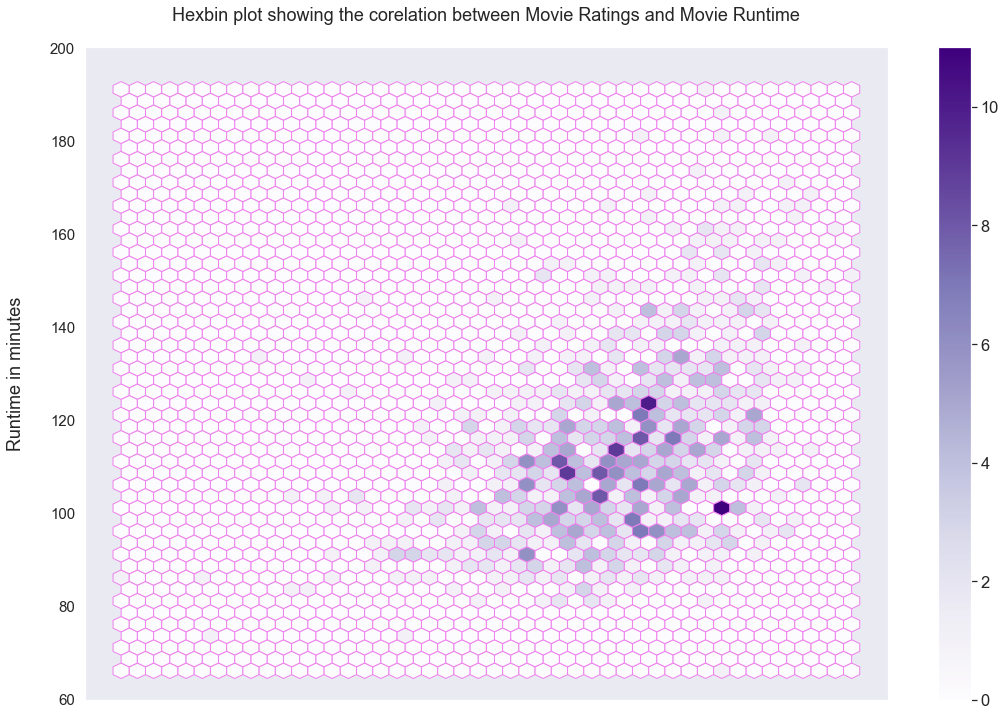

In [947]:
#How much is the movie rating depends on movie runtime

movies_data.plot(kind='hexbin', x='Rating', y='Runtime (Minutes)', figsize=(18, 12), color='violet', grid=False,yticks=np.arange(60,220,20),
                gridsize=45, fontsize=15, colormap='Purples')

plt.xlabel('\nMovie Rating\n')
plt.ylabel('Runtime in minutes\n')
plt.title('Hexbin plot showing the corelation between Movie Ratings and Movie Runtime\n')

plt.savefig('fifth.png')

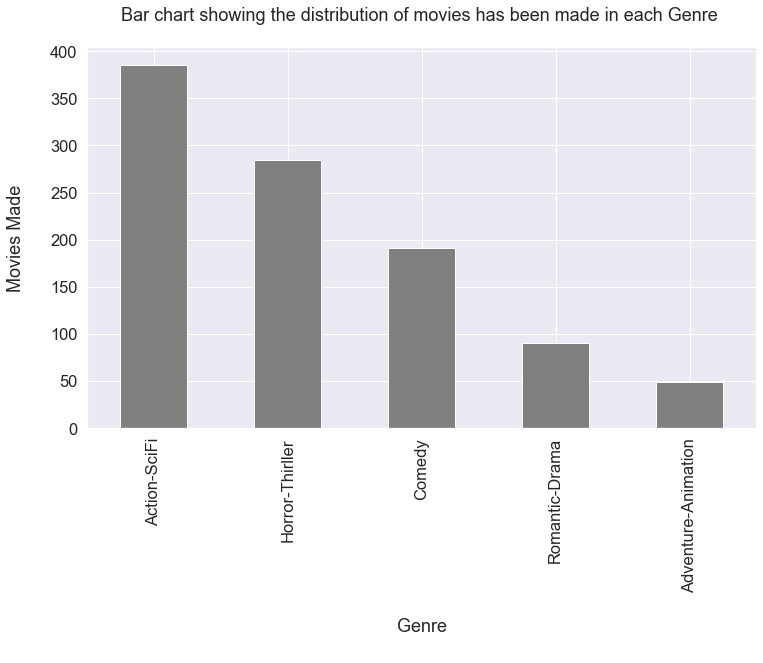

In [948]:
#How many movies has been generated in each genre

movies_data['Genre'].value_counts().plot(kind='bar', figsize=(12, 7), color='grey')
plt.xlabel('\nGenre\n')
plt.ylabel('Movies Made\n')
plt.title('Bar chart showing the distribution of movies has been made in each Genre \n')

plt.savefig('Bar.png')  

In [ ]:
movies_data['Metascore']=(movies_data['Metascore']/10)

movies_data['Metascore'].max()



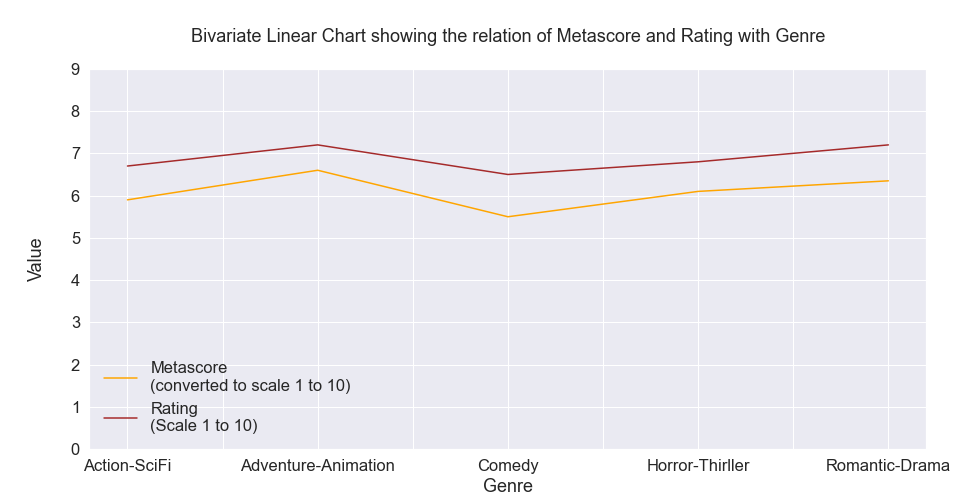

In [946]:
#How is the correlation between metascore and ratings

movies_data.groupby(['Genre'])['Metascore'].median().plot(kind='line', figsize=(15, 7), color='orange')
movies_data.groupby(['Genre'])['Rating'].median().plot(kind='line', figsize=(15, 7), color='brown',yticks=np.arange(0,10,1))

plt.ylabel('\nValue\n')
plt.title('\nBivariate Linear Chart showing the relation of Metascore and Rating with Genre\n')
plt.legend(['Metascore\n(converted to scale 1 to 10)', 'Rating\n(Scale 1 to 10)'])

plt.savefig('line.png')

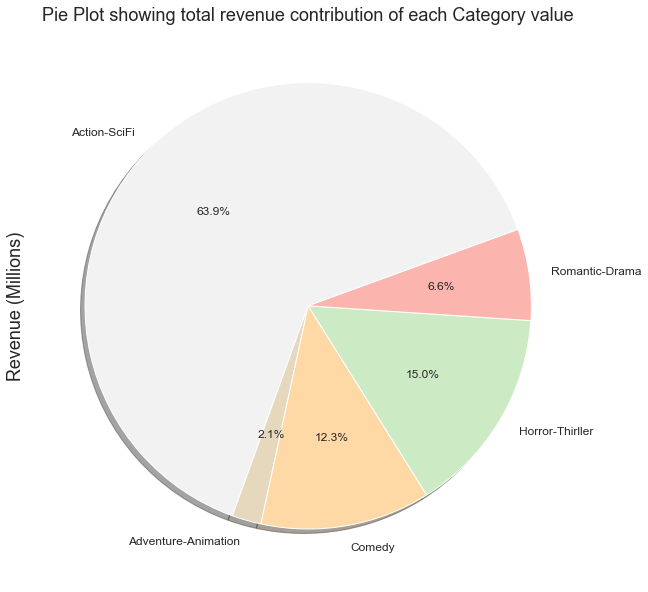

In [868]:
#How much is the contribution of each genre in the revenue


movies_data.groupby(['Genre'])['Revenue (Millions)'].sum().plot(kind='pie', fontsize=12, autopct='%3.1f%%',shadow=True, startangle=20, figsize=(10,12),cmap='Pastel1_r')

plt.title('Pie Plot showing total revenue contribution of each Category value')

plt.savefig('pie1.png')

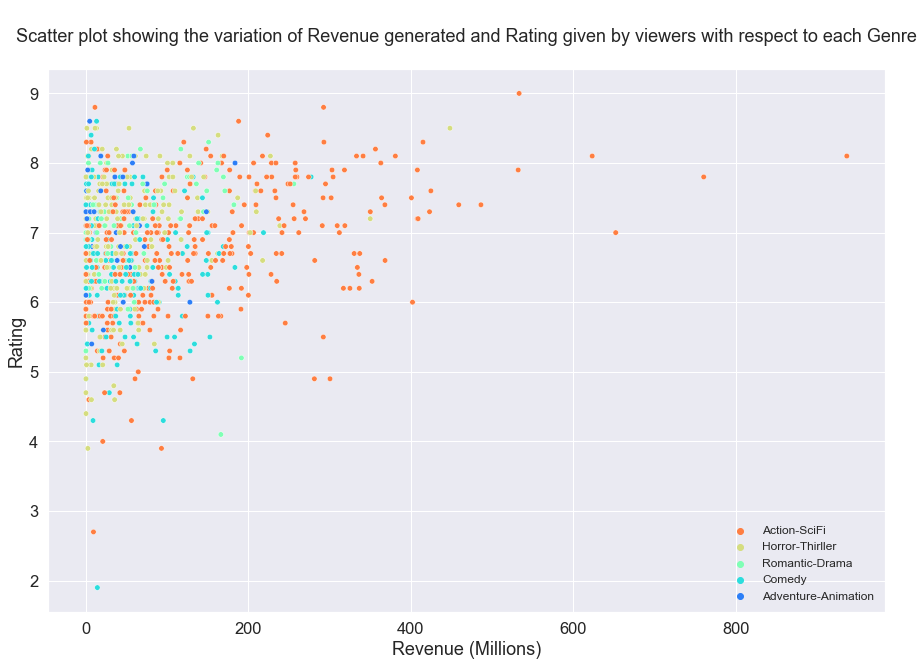

In [929]:
#What is the revenue generated and ratings given with respect to the genre

plt.figure(figsize=(15,10))
sns.scatterplot(data=movies_data, x='Revenue (Millions)', y='Rating', hue='Genre',s=30,palette='rainbow_r')

plt.xlabel('Revenue (Millions)')
plt.ylabel('Rating')
plt.title('\nScatter plot showing the variation of Revenue generated and Rating given by viewers with respect to each Genre\n')
plt.legend(fontsize=12)


plt.savefig('sixth.png')

In [663]:
#Revenue generated by each genre every year

sns.set(font_scale=9)
sns.catplot(x='Year', y='Revenue (Millions)', kind='bar', data=movies_data, col='Genre',palette='spring',height=80,aspect=45/80)
plt.savefig('seventh.png')

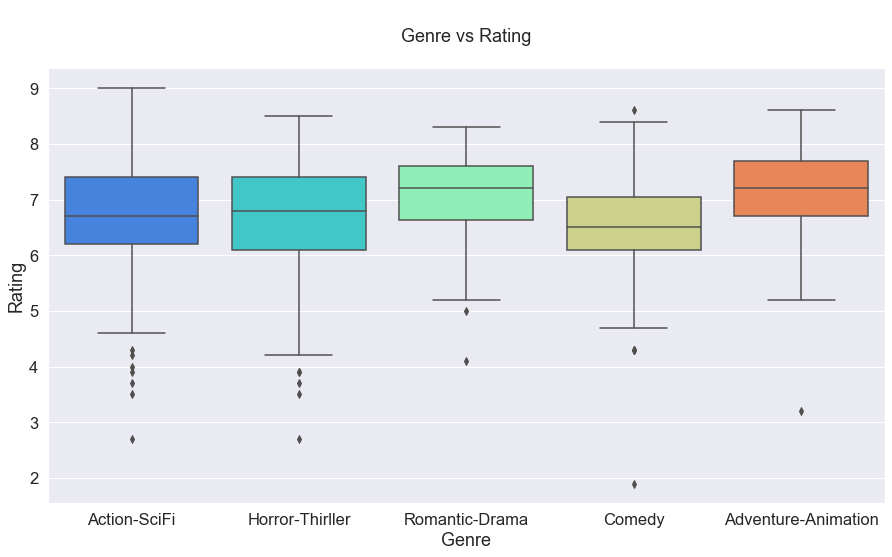

In [669]:
#How is the each genre rated by viewers

sns.set(font_scale=1.5)
plt.figure(figsize=(15,8))

sns.boxplot(data=movies_data, x='Genre', y='Rating', palette='rainbow')

plt.title('\nGenre vs Rating\n')

plt.savefig('eight.png')


PairPlot showing corelation between numerical variables with Genre(categorical variable)



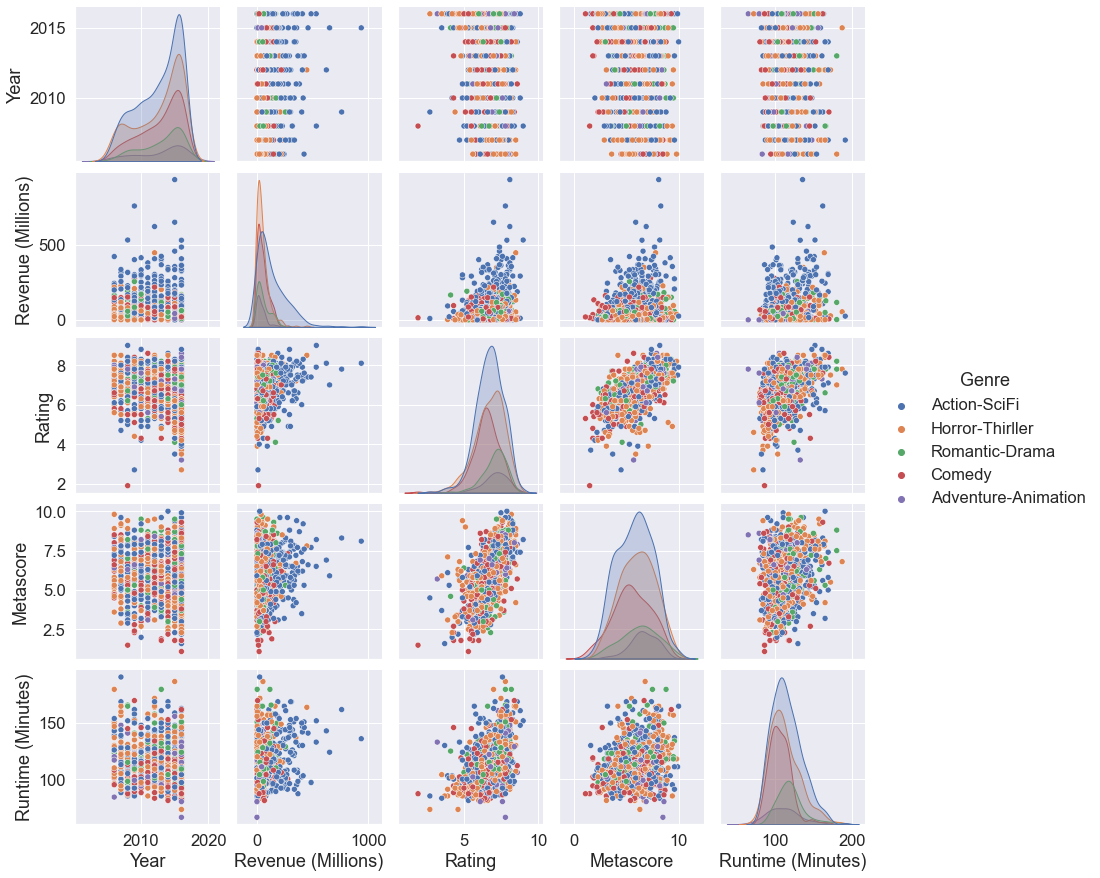

In [715]:
print('\nPairPlot showing corelation between numerical variables with Genre(categorical variable)\n')

sns.pairplot(movies_data,hue='Genre', diag_kind='kde',vars=['Year','Revenue (Millions)','Rating','Metascore','Runtime (Minutes)'])

plt.savefig('tenth.png')

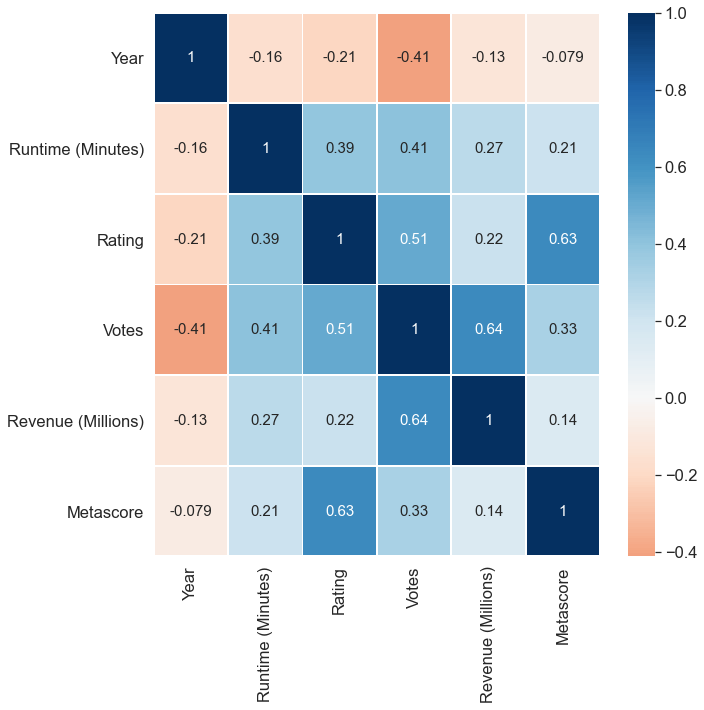

In [742]:
plt.figure(figsize=(10,10))
sns.heatmap(movies_data.corr(),cmap='RdBu',center=0,annot=True,annot_kws={'fontsize':15},linewidth=1)#square=True)
plt.savefig('extra.png')

---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- Production of the movies has been drastically increased throughout the decade especially from 2015 to 2016 that means movies(entertainment) has gained more popularity as compared to previous years

- Action and SciFi movies are trending these days.

- Action-SciFi movies has been produced more as it generates more revenue as people prefer to watch (pay) these kind of movies in theatres

- People are much aware about the movies with good content as the ratings and metascore are positively correlated 

- Other genres except Action and SciFi has been rated good still could not make maximum revenue as compare to Action and SciFi movies

<a name = Section92></a>
### **9.2 Actionable Insights**

- Movies with other genres except only Action and SciFi should be produced and promoted more
- The Runtime of the movie should be between 100 minutes to 140 minutes not more than that as people do not prefer to watch longer movies